In [10]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.interpolate import interp1d

In [35]:
conn = sq.connect("plitech_database.db")
cur = conn.cursor()
df = pd.read_sql_query('select * from recap',conn)
conn.close()

df["date_arrivé"] = pd.to_datetime(df["date_arrivé"])

df['qty_tole'] = df.qty*df.longueur*df.largeur/2000000
df["ca"] = df.total_frais_pliage+df.total_vente_tole

df1 = df.groupby(["nom_client","date_arrivé","heure_arrivé"]).agg({'ca':'mean','num_facture':'mean','qty_tole':sum,"total_vente_tole":'mean',	"total_frais_pliage":'mean',	"total_remise":'mean',	"total_chute":'mean'}).reset_index()
df2 = df.groupby(["num_facture","date_arrivé","nom_client"]).agg({'ca':'mean','qty_tole':sum,"total_vente_tole":'mean',	"total_frais_pliage":'mean',	"total_remise":'mean',	"total_chute":'mean'}).reset_index()

df1['frais_pliage_by_tole'] = df.total_frais_pliage/df.qty_tole


In [37]:
df2 = df2.set_index("date_arrivé")

In [38]:
df2

,num_facture,nom_client,ca,qty_tole,total_vente_tole,total_frais_pliage,total_remise,total_chute
date_arrivé,,,,,,,,
2023-03-01,1,RAHERY,103000.0,1.0,88000.0,15000.0,0.0,0.000
2023-03-02,2,NIX,135000.0,1.3,115500.0,19500.0,0.0,0.000
2023-03-03,3,SAFIDY,405000.0,3.8,336000.0,69000.0,0.0,0.000
2023-03-03,4,JOHARY,12000.0,1.0,0.0,12000.0,0.0,0.000
2023-03-08,5,TINA,121000.0,1.0,103000.0,18000.0,0.0,0.000
...,...,...,...,...,...,...,...,...
2023-08-10,205,RAHERY,21000.0,1.0,0.0,21000.0,0.0,0.150
2023-08-10,206,TOKY,6000.0,1.0,0.0,6000.0,0.0,0.000
2023-08-11,207,FANILO,90500.0,1.0,77000.0,13500.0,3700.0,0.000


KeyError: 'total_frais_pliage\t'

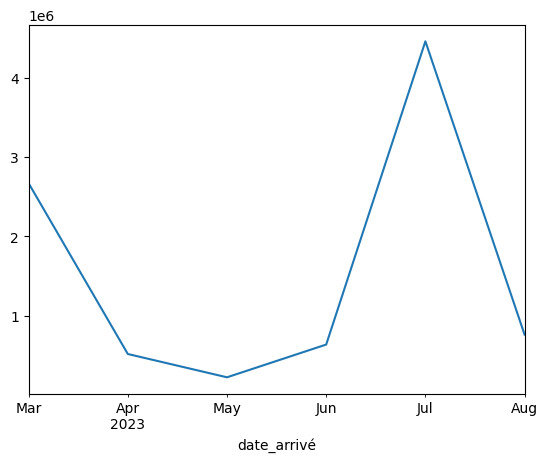

In [40]:
df2['ca'].resample('M').sum().plot(kind="line")
df2['total_frais_pliage'].resample('M').sum().plot(kind="line")

C:\Users\USER\AppData\Local\Temp\ipykernel_10288\1803911580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.resample('W').sum()[["total_frais_pliage"]].plot(kind="line")


<AxesSubplot: xlabel='date_arrivé'>

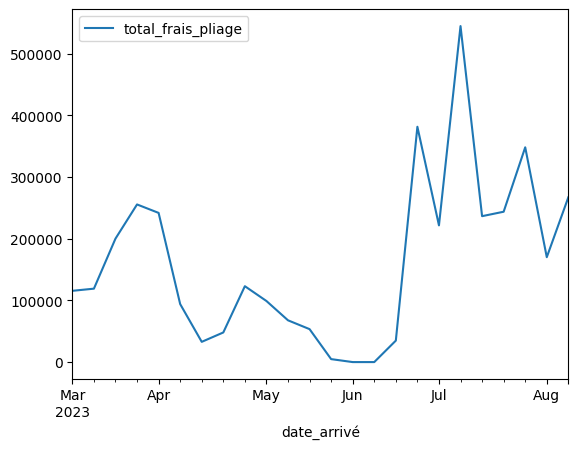

In [15]:
df2.resample('W').sum()[["total_frais_pliage"]].plot(kind="line")

In [16]:
df1.total_frais_pliage.sort_values(ascending=False).mean()

21920.338983050846

In [17]:
df.tail(10)

,qty,is_plain,longueur,largeur,type,epaisseur,nom_client,date_arrivé,heure_arrivé,total_vente_tole,total_frais_pliage,total_remise,total_chute,num_facture,qty_tole,epaisseur_order,is_item_sold
198,1,Oui,2000,180,TPN,8/10,KEVIN,2023-05-08,14:30:00,0,5800,0,0.0,62,0.1800,NaN,Non
199,1,Oui,2000,200,TPN,12/10,LOVA,2023-05-11,12:23:00,0,3900,0,0.0,63,0.2000,NaN,Non
200,2,Oui,660,500,TPN,10/10,ROLAND,2023-05-11,12:24:00,0,18000,0,0.0,64,0.3300,NaN,Non
201,3,Oui,1000,80,TPN,12/10,NELSON,2023-05-11,12:25:00,0,9000,0,0.0,65,0.1200,NaN,Non
202,1,Oui,1500,410,TPN,10/10,KEVIN,2023-05-12,12:27:00,0,10000,0,0.0,66,0.3075,NaN,Non
203,1,Oui,2000,200,TPP,30/100,FINARITRA,2023-05-17,12:28:00,0,9000,0,0.0,67,0.2000,NaN,Non
204,1,Non,2000,1000,TPN,12/10,JOHARY,2023-05-19,12:29:00,0,10000,0,0.0,68,1.0000,NaN,Non
205,1,Non,2000,1000,TPN,15/10,ZO,2023-05-19,11:45:00,0,34400,0,0.0,69,1.0000,NaN,Non
206,1,Non,2000,1000,TPN,2mm,ZO,2023-05-19,11:45:00,0,34400,0,0.0,69,1.0000,NaN,Non
207,1,Non,2000,1000,TPN,10/10,ZO,2023-05-22,14:42:00,0,4800,0,0.0,70,1.0000,NaN,Non


In [18]:

df1.sort_values(by='total_frais_pliage',ascending=False).head()


,nom_client,date_arrivé,heure_arrivé,num_facture,qty_tole,total_vente_tole,total_frais_pliage,total_remise,total_chute,frais_pliage_by_tole
35,HAJA,2023-07-07,20:17:00,153.0,14.0,0.0,214000.0,0.0,0.463000,15000.000000
97,MBOLA,2023-03-21,11:49:00,23.0,7.0,0.0,105000.0,0.0,0.000000,12000.000000
79,LIVA,2023-07-25,11:08:00,184.0,7.0,490000.0,90000.0,26500.0,0.004356,15000.000000
173,ZO,2023-07-03,19:38:00,101.0,2.0,0.0,80100.0,0.0,0.725000,2275.600506
46,JOHARY,2023-03-31,00:00:00,33.0,7.0,0.0,77000.0,0.0,0.000000,15000.000000


In [20]:
df1.set_index('date_arrivé')['juin']

KeyError: 'juin'

In [6]:
(df1.total_frais_pliage/df1.qty_tole).mean()
#df1.total_frais_pliage.sum()

19857.892241355265

In [7]:
(df1.qty_tole-df1.total_chute).sum()

168.71341750000002

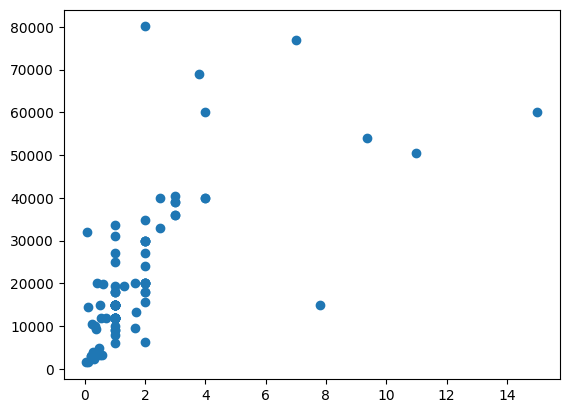

In [8]:
plt.scatter(df1.qty_tole,df1.total_frais_pliage)

In [9]:
df.columns

Index(['qty', 'is_plain', 'longueur', 'largeur', 'type', 'epaisseur',
       'nom_client', 'date_arrivé', 'heure_arrivé', 'total_vente_tole',
       'total_frais_pliage', 'total_remise', 'total_chute', 'num_facture',
       'qty_tole'],
      dtype='object')

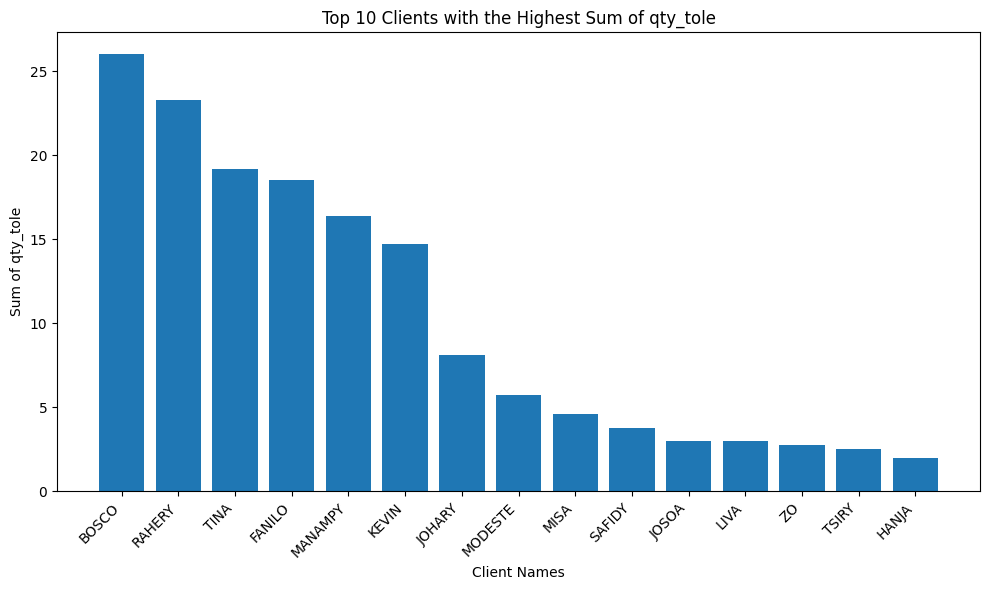

In [10]:
grouped_data = df1.groupby('nom_client')['qty_tole'].sum()

# Sort the data in descending order and select the top 10 clients
top_10_clients = grouped_data.sort_values(ascending=False).head(15)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_10_clients.index, top_10_clients.values)
plt.xlabel('Client Names')
plt.ylabel('Sum of qty_tole')
plt.title('Top 10 Clients with the Highest Sum of qty_tole')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

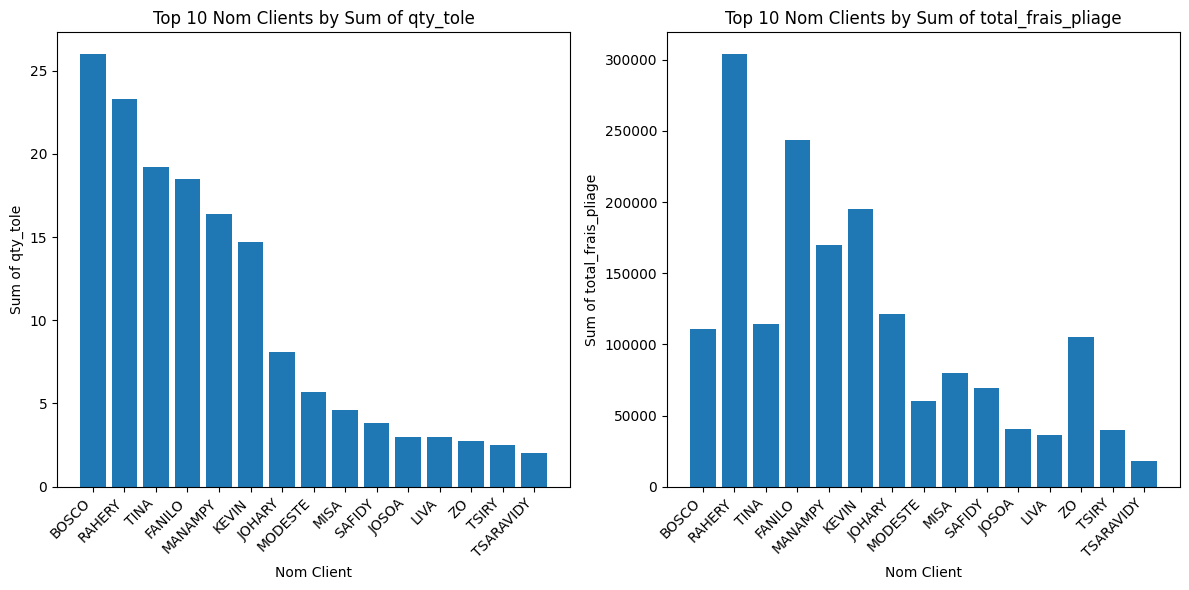

In [11]:
grouped_data = df1.groupby('nom_client')

# Step 2: Calculate the sum of 'qty_tole' and 'total_frais_pliage' for each 'nom_client'
sum_qty_tole = grouped_data['qty_tole'].sum()
sum_total_frais_pliage = grouped_data['total_frais_pliage'].sum()

# Step 3: Combine the sums into a new DataFrame
sum_df = pd.DataFrame({
    'sum_qty_tole': sum_qty_tole,
    'sum_total_frais_pliage': sum_total_frais_pliage
})

# Step 4: Sort the data based on the calculated sums in descending order
sum_df = sum_df.sort_values(by=['sum_qty_tole', 'sum_total_frais_pliage'], ascending=False)

# Step 5: Extract the top 10 'nom_client' based on the sums
top_10_clients = sum_df.head(15)

# Step 6: Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_10_clients.index, top_10_clients['sum_qty_tole'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nom Client')
plt.ylabel('Sum of qty_tole')
plt.title('Top 10 Nom Clients by Sum of qty_tole')

plt.subplot(1, 2, 2)
plt.bar(top_10_clients.index, top_10_clients['sum_total_frais_pliage'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nom Client')
plt.ylabel('Sum of total_frais_pliage')
plt.title('Top 10 Nom Clients by Sum of total_frais_pliage')

plt.tight_layout()
plt.show()


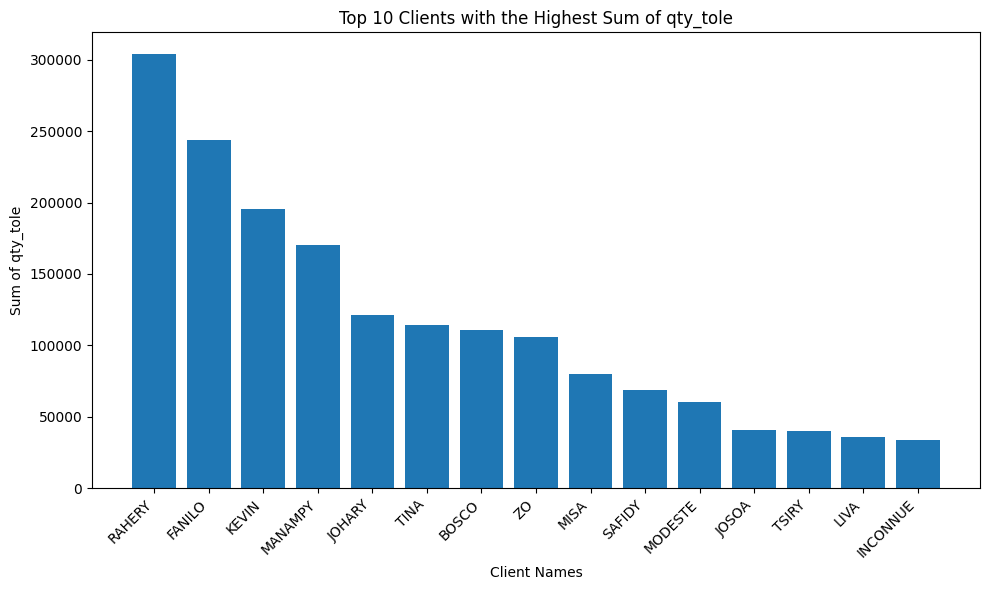

In [12]:
grouped_data = df1.groupby('nom_client')['total_frais_pliage'].sum()

# Sort the data in descending order and select the top 10 clients
top_10_clients = grouped_data.sort_values(ascending=False).head(15)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_10_clients.index, top_10_clients.values)
plt.xlabel('Client Names')
plt.ylabel('Sum of qty_tole')
plt.title('Top 10 Clients with the Highest Sum of qty_tole')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
grouped_data = df1.groupby('nom_client')

# Step 2: Calculate the sum of 'qty_tole' and 'total_frais_pliage' for each 'nom_client'
sum_df = grouped_data['total_frais_pliage'].sum()


# Step 4: Sort the data based on the calculated sums in descending order
sum_df = sum_df.sort_values(ascending=False)
# Step 5: Extract the top 10 'nom_client' based on the sums
top_10_clients = sum_df.head(10).reset_index()

# Step 6: Plot the results using Plotly Express
fig = px.bar(top_10_clients, x='nom_client', y='total_frais_pliage',
             title='Top 10 Nom Clients by Sum of qty_tole and total_frais_pliage',
             labels={'value': 'Sum'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [14]:
grouped_data = df1.groupby('nom_client')

# Step 2: Calculate the sum of 'qty_tole' and 'total_frais_pliage' for each 'nom_client'
sum_qty_tole = grouped_data['qty_tole'].sum()
sum_total_frais_pliage = grouped_data['total_frais_pliage'].sum()

# Step 3: Combine the sums into a new DataFrame
sum_df = pd.DataFrame({
    'sum_qty_tole': sum_qty_tole,
    'sum_total_frais_pliage': sum_total_frais_pliage
}).reset_index()

# Step 4: Sort the data based on the calculated sums in descending order
sum_df = sum_df.sort_values(by=['sum_qty_tole', 'sum_total_frais_pliage'], ascending=False)

# Step 5: Extract the top 10 'nom_client' based on the sums
top_10_clients = sum_df.head(10)

# Step 6: Plot the results using Plotly Express
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Bar(x=top_10_clients['nom_client'], y=top_10_clients['sum_total_frais_pliage'],
                     name='Sum of total_frais_pliage'), secondary_y=False)
fig.add_trace(go.Bar(x=top_10_clients['nom_client'], y=top_10_clients['sum_qty_tole'],
                     name='Sum of qty_tole'), secondary_y=True)

fig.update_layout(title='Top 10 Nom Clients by Sum of qty_tole and total_frais_pliage',
                  xaxis_tickangle=-45, xaxis_title='Nom Client', barmode='group')

fig.update_yaxes(title_text='Sum of total_frais_pliage', secondary_y=False)
fig.update_yaxes(title_text='Sum of qty_tole', secondary_y=True)

fig.show()

In [15]:
df1.nom_client.value_counts()

nom_client
RAHERY        22
KEVIN         13
FANILO         8
MANAMPY        7
MODESTE        4
TINA           4
JOHARY         3
ZO             3
MISA           2
TSARAVIDY      2
BOSCO          2
MAMY DADDY     2
BOLIDA         2
SANTATRA       1
SAMIR          1
ROBINSON       1
TSIRY          1
RADO           1
NIX            1
SAFIDY         1
ANDRY          1
MENJA          1
AVOTRA         1
LIVA           1
JOSOA          1
JAMES          1
INCONNUE       1
HANJA          1
HANITRA        1
FENOSOA        1
ELYSEE         1
CHELAH         1
MAMY           1
Name: count, dtype: int64

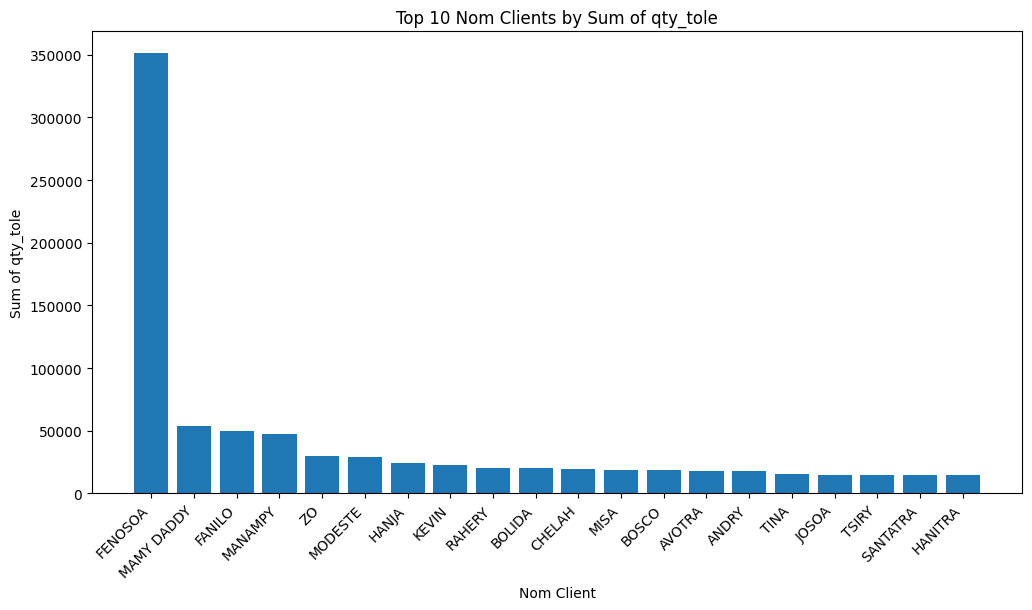

In [16]:
grouped_data = df1.groupby('nom_client')

# Step 2: Calculate the sum of 'qty_tole' and 'total_frais_pliage' for each 'nom_client'
mean_frais_pliage_by_tole = grouped_data['frais_pliage_by_tole'].mean()



# Step 4: Sort the data based on the calculated sums in descending order
mean_frais_pliage_by_tole = mean_frais_pliage_by_tole.sort_values(ascending=False)

# Step 5: Extract the top 10 'nom_client' based on the sums
top_10_clients = mean_frais_pliage_by_tole.head(20)

# Step 6: Plot the results
plt.figure(figsize=(12, 6))

plt.subplot()
plt.bar(top_10_clients.index, top_10_clients)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nom Client')
plt.ylabel('Sum of qty_tole')
plt.title('Top 10 Nom Clients by Sum of qty_tole')


plt.show()

In [17]:
top_10_clients.reset_index()

,nom_client,frais_pliage_by_tole
0,FENOSOA,351108.185210
1,MAMY DADDY,53653.846154
2,FANILO,49715.633605
3,MANAMPY,47344.569401
4,ZO,29500.000000
5,MODESTE,28762.500000
6,HANJA,24102.564103
7,KEVIN,22567.521368
8,RAHERY,20488.636364
9,BOLIDA,20000.000000


In [18]:
df.nom_client.nunique()

33

In [19]:
df1.total_frais_pliage.sum()/df1.qty_tole.sum()

11629.568074466672

In [20]:
df1.groupby('nom_client')["qty_tole"].sum().sort_values(ascending=False).index[0]

'BOSCO'

In [21]:
def plot_by_month(result):
    result['date_arrivé'] = pd.to_datetime(result['date_arrivé'])

    # Step 2: Extract the month and year from 'date_arrivé'
    result['month_year'] = result['date_arrivé'].dt.to_period('M')

    # Step 3: Group the data by month and year, and calculate the sum of 'total_frais_pliage'
    grouped_data = result.groupby('month_year')['total_frais_pliage'].sum()

    # Create a Streamlit app
 

    # Plot the data using matplotlib and display it in Streamlit
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data.index, grouped_data.values)
    plt.xlabel('Month-Year')
    plt.ylabel('Total Frais Pliage')
    plt.title('Total Frais Pliage by Month-Year')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot using Streamlit
    plt.show()

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

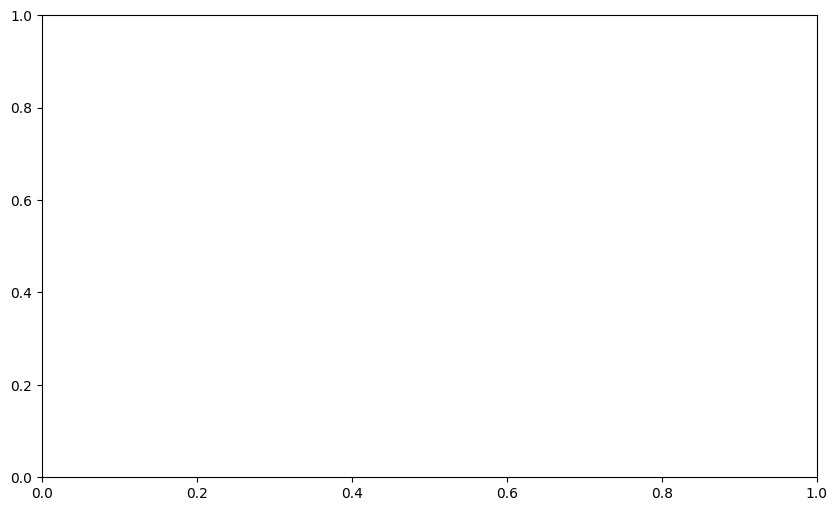

In [22]:
plot_by_month(df1)

In [ ]:
result = df1
result['date_arrivé'] = pd.to_datetime(result['date_arrivé'])
result['month_year'] = result['date_arrivé'].dt.to_period('M')
grouped_data = result.groupby('month_year')['total_frais_pliage'].sum()


<BarContainer object of 2 artists>

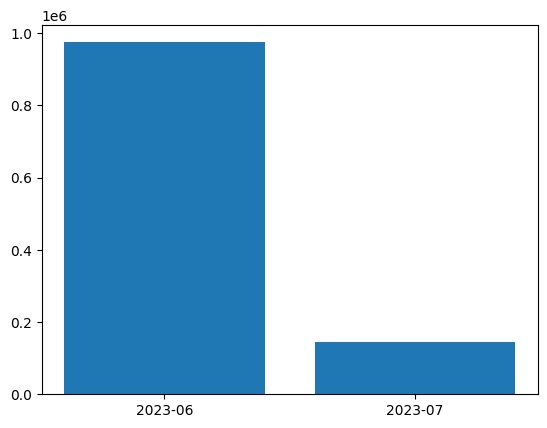

In [ ]:
plt.bar(grouped_data.index.astype(str),grouped_data.values)

In [ ]:
import pandas as pd
import streamlit as st
import plotly.express as px

# Assuming you have the dataset loaded into a DataFrame called 'df'
df = df1
# Step 1: Convert 'date_arrivé' to a proper date format
df['date_arrivé'] = pd.to_datetime(df['date_arrivé'])

# Step 2: Extract the month and year from 'date_arrivé'
df['month_year'] = df['date_arrivé'].dt.to_period('M')

# Step 3: Group the data by month and year, and calculate the sum of 'total_frais_pliage'
grouped_data = df.groupby('month_year')['total_frais_pliage'].sum().reset_index()




# Plot the data using Plotly Express and display it in Streamlit
fig = px.bar(grouped_data, x='month_year', y='total_frais_pliage',
             labels={'total_frais_pliage': 'Total Frais Pliage'},
             title='Total Frais Pliage by Month-Year')

fig.show()
fig.update_layout(xaxis_tickangle=-45)



TypeError: Object of type Period is not JSON serializable

,month_year,total_frais_pliage
0,2023-06,974300.0
1,2023-07,144200.0


<AxesSubplot: xlabel='nom_client'>

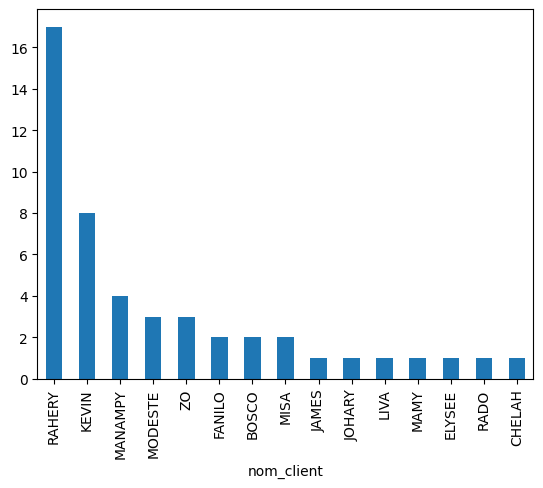

In [ ]:
df1.nom_client.value_counts().head(15).plot(kind='bar')

In [ ]:
fig = px.bar(df1.nom_client.value_counts().head(15))
fig.show()

In [ ]:
df1['date_arrivé'] = pd.to_datetime(df1['date_arrivé'], errors='coerce')

# Step 2: Sort the DataFrame by 'nom_client' and 'date_arrivé'
df_sorted = df1.sort_values(by=['nom_client', 'date_arrivé'])

# Step 3: Calculate the time difference between consecutive arrival dates for each client
df_sorted['arrival_interval'] = df_sorted.groupby('nom_client')['date_arrivé'].diff()

# Step 4: Calculate the average arrival interval in days
average_arrival_interval_days = df_sorted['arrival_interval'].mean().days

In [ ]:
average_arrival_interval_days



4

In [ ]:
df_sorted

,nom_client,date_arrivé,heure_arrivé,qty_tole,total_vente_tole,total_frais_pliage,total_remise,total_chute,frais_pliage_by_tole
0,BOLIDA,2023-06-13,18:36:00,0.400000,0.0,20000.0,0.0,0.00000,18000.000000
1,BOSCO,2023-06-19,19:01:00,15.000000,0.0,60000.0,0.0,0.00000,18000.000000
2,BOSCO,2023-06-30,19:31:00,11.000000,0.0,50600.0,0.0,0.00000,10000.000000
3,CHELAH,2023-06-16,19:00:00,0.390000,0.0,9400.0,0.0,0.00000,30000.000000
4,ELYSEE,2023-06-16,18:58:00,1.000000,97000.0,15000.0,0.0,0.35000,5760.000000
5,FANILO,2023-06-12,09:15:00,1.000000,0.0,12000.0,0.0,0.00000,31200.000000
6,FANILO,2023-06-23,15:14:00,2.000000,0.0,30000.0,0.0,0.00000,19500.000000
7,JAMES,2023-07-03,19:42:00,0.480600,0.0,4800.0,0.0,0.12636,12000.000000
8,JOHARY,2023-06-16,18:56:00,0.091140,0.0,32000.0,0.0,0.00000,12000.000000
9,KEVIN,2023-06-09,18:32:00,1.000000,0.0,12000.0,0.0,0.00000,12000.000000


In [23]:
df1

,nom_client,date_arrivé,heure_arrivé,qty_tole,total_vente_tole,total_frais_pliage,total_remise,total_chute,frais_pliage_by_tole,month_year
0,ANDRY,2023-04-03,00:00:00,1.00,0.0,6000.0,0.0,0.000,18000.0,2023-04
1,AVOTRA,2023-03-24,21:10:00,1.00,0.0,12000.0,0.0,0.000,18000.0,2023-03
2,BOLIDA,2023-03-09,20:38:00,1.00,0.0,8000.0,0.0,0.000,10000.0,2023-03
3,BOLIDA,2023-06-13,18:36:00,0.40,0.0,20000.0,0.0,0.000,30000.0,2023-06
4,BOSCO,2023-06-19,19:01:00,15.00,0.0,60000.0,0.0,0.000,5760.0,2023-06
...,...,...,...,...,...,...,...,...,...,...
89,TSARAVIDY,2023-03-21,21:05:00,1.00,84000.0,9000.0,0.0,0.000,10000.0,2023-03
90,TSIRY,2023-06-22,19:08:00,2.50,0.0,40000.0,0.0,0.000,15000.0,2023-06
91,ZO,2023-06-06,18:24:00,0.50,0.0,15000.0,0.0,0.000,6000.0,2023-06
92,ZO,2023-06-22,19:06:00,0.25,0.0,10400.0,0.0,0.050,16500.0,2023-06


In [1]:

import locale
ma_locale = locale.setlocale(locale.LC_ALL, '')
print(ma_locale)




French_France.1252
2 099,24


In [2]:
x = 2099.236569633
print(f"{x:n}")

2 099,24


In [6]:
import sqlite3 
conn = sqlite3.connect("plitech_database.db")
cur = conn.cursor()

In [7]:
cur.execute("delete from billetage where date = '2023-08-31'")

In [8]:
conn.commit()

In [9]:
conn.close()